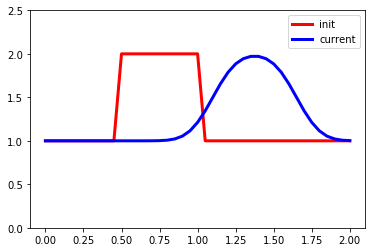

In [4]:
import numpy
from matplotlib import pyplot
import time, sys
%matplotlib inline
nx = 41
dx = 2 / (nx-1)
nt = 25
dt = .025
c = 1

u = numpy.ones(nx)
u[int(.5 / dx):int(1 / dx + 1)] = 2

pyplot.ylim([0,2.5])
pyplot.plot(numpy.linspace(0,2,nx),u,'r',lw=3,label='init')

un = numpy.ones(nx)

for n in range(nt): 
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])

pyplot.plot(numpy.linspace(0,2,nx),u,'b',lw=3,label='current')

pyplot.legend()
pyplot.show()

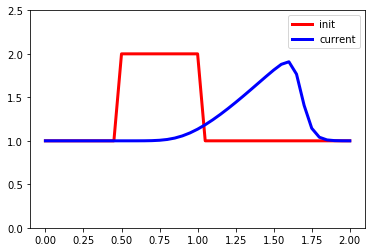

In [6]:
import numpy
from matplotlib import pyplot
import time, sys
%matplotlib inline
nx = 41
dx = 2 / (nx-1)
nt = 25
dt = 0.5 / nt
u = numpy.ones(nx)
u[int(0.5/dx):int(1/dx+1)] = 2
c = 1
un = numpy.ones(nx)
pyplot.ylim([0,2.5])
pyplot.plot(numpy.linspace(0,2,nx),u,'r',lw=3,label='init')

for n in range(nt): 
    un = numpy.copy(u)
    for i in range(1, nx):
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
        
pyplot.plot(numpy.linspace(0,2,nx),u,'b',lw=3,label='current')
pyplot.legend()
pyplot.show()

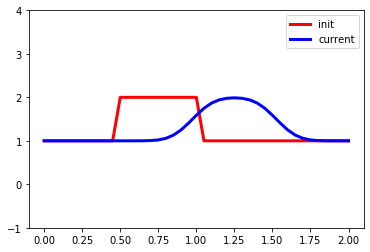

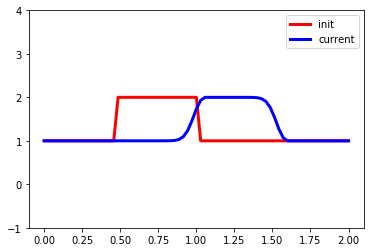

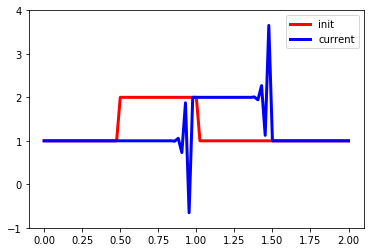

In [31]:
import numpy
from matplotlib import pyplot
#import time, sys
%matplotlib inline
def linearconv(nx): 
    dx = 2 / (nx-1)
    nt = 20
    dt = .025
    c = 1
    u = numpy.ones(nx)
    u[int(.5 / dx):int(1 / dx + 1)] = 2
    pyplot.ylim([-1,4])
    pyplot.plot(numpy.linspace(0,2,nx),u,'r',lw=3,label='init')
    un = numpy.ones(nx)
    for n in range(nt): 
        un = u.copy()
        for i in range(1, nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
    pyplot.plot(numpy.linspace(0,2,nx),u,'b',lw=3,label='current')
    pyplot.legend()
    pyplot.show()
    
linearconv(41)
linearconv(71)
linearconv(85)
    

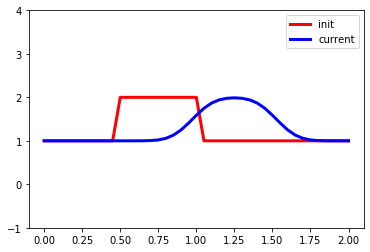

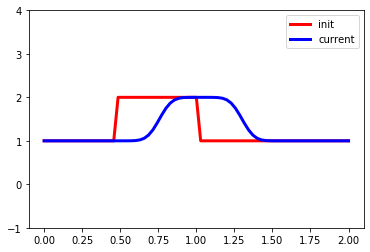

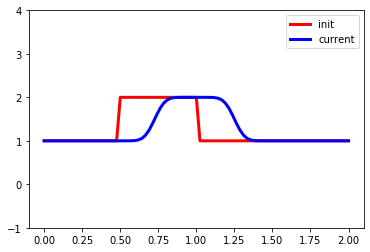

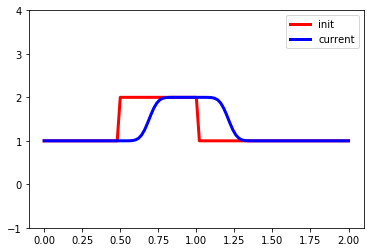

In [34]:
import numpy
from matplotlib import pyplot
#import time, sys
%matplotlib inline
def linearconv(nx): 
    dx = 2 / (nx-1)
    nt = 20
    sigma = 0.5
    #dt = .025
    dt = sigma*dx
    c = 1
    u = numpy.ones(nx)
    u[int(.5 / dx):int(1 / dx + 1)] = 2
    pyplot.ylim([-1,4])
    pyplot.plot(numpy.linspace(0,2,nx),u,'r',lw=3,label='init')
    un = numpy.ones(nx)
    for n in range(nt): 
        un = u.copy()
        for i in range(1, nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
    pyplot.plot(numpy.linspace(0,2,nx),u,'b',lw=3,label='current')
    pyplot.legend()
    pyplot.show()
    
linearconv(41)
linearconv(71)
linearconv(85)
linearconv(101)

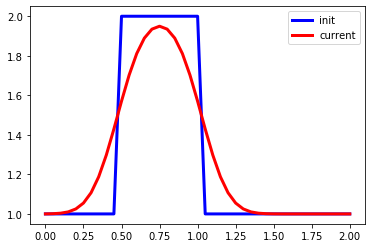

In [35]:
import numpy
from matplotlib import pyplot
%matplotlib inline
nx = 41
dx = 2 / (nx - 1)
nt = 20
nu = 0.3
sigma = 0.2
dt = sigma * dx**2 / nu
u = numpy.ones(nx)
u[int(.5/dx):int(1/dx+1)] = 2
pyplot.plot(numpy.linspace(0,2,nx),u,'b',lw=3,label='init')
un = numpy.ones(nx)
for n in range(nt):
    un = u.copy()    
    for i in range(1,nx-1):
        u[i] = un[i] + nu*dt/dx**2*(un[i+1]-2*un[i]+un[i-1])
pyplot.plot(numpy.linspace(0,2,nx),u,'r',lw=3,label='current')
pyplot.legend()
pyplot.show()

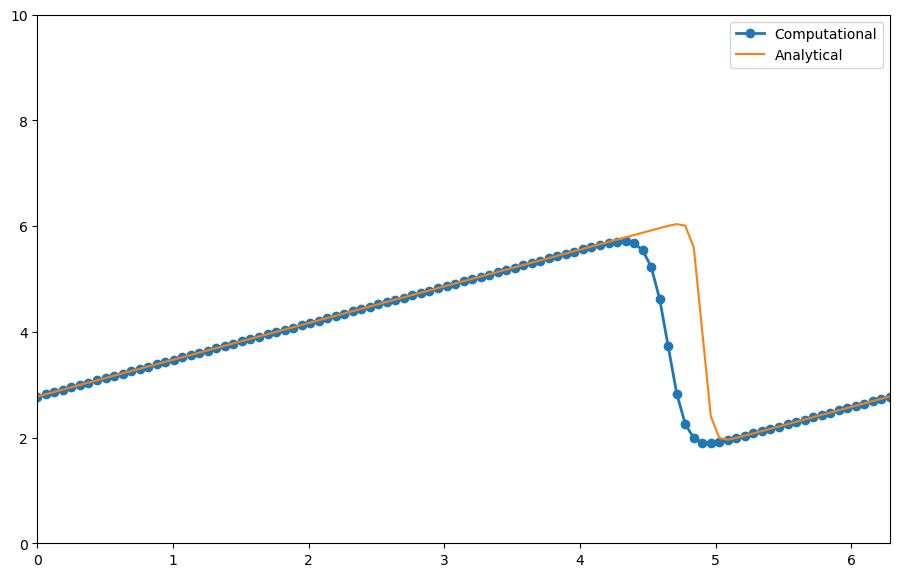

In [54]:
import numpy
import sympy
%matplotlib inline
from sympy import init_printing
init_printing(use_latex=True)

x, nu, t = sympy.symbols(' x nu t ')
phi = (sympy.exp(-(x-4*t)**2/(4*nu*(t+1))) + sympy.exp(-(x-4*t-2*numpy.pi)**2/(4*nu*(t+1))))
phiprime = phi.diff(x)

from sympy.utilities.lambdify import lambdify
u = -2*nu*(phiprime/phi)+4

ufunc = lambdify((t,x,nu),u)
#print(ufunc(1,4,3))
#print(u)

from matplotlib import pyplot

nx = 101
nt = 100
dx = 2*1.0*numpy.pi / ( nx - 1 )
nu = 0.07
dt = dx * nu
x = numpy.linspace(0, 2 * numpy.pi, nx)
un = numpy.empty(nx)
t = 0
u = numpy.asarray([ufunc(t, x0, nu) for x0 in x])
#print( u )

for n in range(nt):
    un = numpy.copy(u)
    for i in range(nx-1):
        u[i] = un[i] - un[i] * dt/dx * (un[i]-un[i-1])+  nu *1.0* dt/(dx**2) * (un[i+1] - 2*un[i] + un[i-1])
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx **2 *	(un[1] - 2 * un[0] + un[-2])
    u[-1] = u[0]


u_analytical = numpy.asarray([ufunc(nt * dt, xi, nu) for xi in x])

pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.plot(x, u, marker='o', lw=2, label='Computational')
pyplot.plot(x, u_analytical, label='Analytical')
pyplot.xlim([0, 2*numpy.pi])
pyplot.ylim([0, 10])
pyplot.legend()
pyplot.show()



In [48]:
phi

In [50]:
print(phi)

exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))


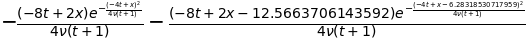

In [51]:
phiprime

In [52]:
print(phiprime)

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))


In [71]:
import numpy
u = numpy.array((0, 1, 2, 3, 4, 5))
print('u =', u)
print('len(u) = ',len(u))

s = range(len(u))
print(s)

print('u[1:] =',u[1:])
print('u[0:-1] =',u[0:-1])
print('u[1:] - u[0:-1] =',u[1:] - u[0:-1])


for i in range(1, len(u)):
    print(u[i] - u[i-1])

u = [0 1 2 3 4 5]
len(u) =  6
range(0, 6)
u[1:] = [1 2 3 4 5]
u[0:-1] = [0 1 2 3 4]
u[1:] - u[0:-1] = [1 1 1 1 1]
1
1
1
1
1


In [24]:
%%time
import numpy
nx = 81
ny = 81
nt = 100
c = 1
dx = 2*1.0 / (nx-1)
dy = 2*1.0 / (ny-1)
sigma = .2
dt = sigma*dx
x = numpy.linspace(0, 2, nx)
#print('x = ',x)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
#print('u = ',u)

for n in range(nt + 1):
    un = u.copy()
    row, col = numpy.shape(u)
    for j in range(1, row):
        for i in range(1, col):
            u[j, i] = (un[j, i] - (c * dt / dx * (un[j, i] - un[j, i-1])) - (c * dt / dy * (un[j, i] - un[j-1, i])))
            u[0, :] = 1
            u[-1, :] = 1
            u[:, 0] = 1
            u[:, -1] = 1


Wall time: 5.78 s


In [15]:
%%time
import numpy
nx = 81
ny = 81
nt = 100
c = 1
dx = 2*1.0 / (nx-1)
dy = 2*1.0 / (ny-1)
sigma = .2
dt = sigma*dx
x = numpy.linspace(0, 2, nx)
#print('x = ',x)
y = numpy.linspace(0, 2, ny)


u = numpy.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
#print('u = ',u)

for n in range(nt + 1):
    un = u.copy()
    u[1:, 1:] = (un[1:, 1:] - (c * dt / dx * (un[1:, 1:] - un[1:, :-1])) - (c * dt / dy * (un[1:, 1:] - un[:-1, 1:])))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

Wall time: 11 ms


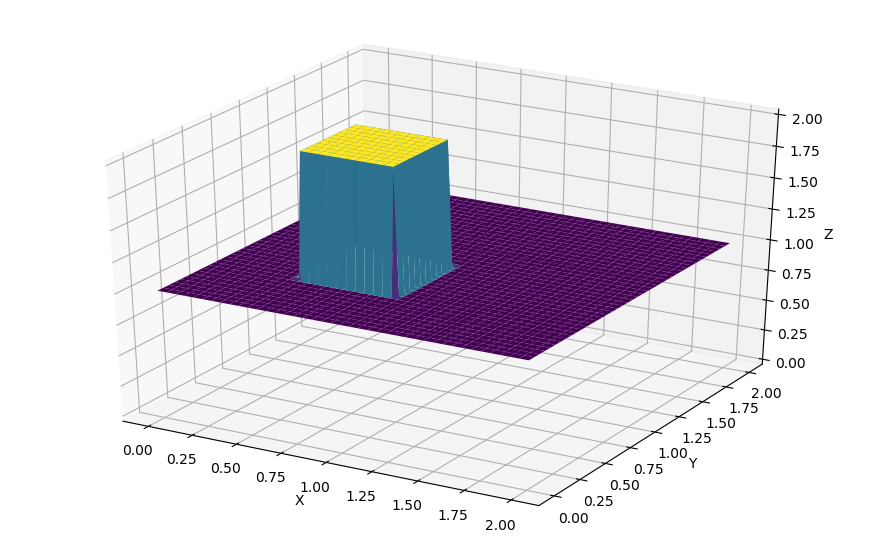

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import numpy
from matplotlib import pyplot, cm
%matplotlib inline

nx = 81
ny = 81
nt = 100
c = 1
dx = 2*1.0 / (nx-1)
dy = 2*1.0 / (ny-1)
sigma = .2
dt = sigma*dx

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))
un = numpy.ones((ny, nx))

u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u[:], cmap = cm.viridis)
ax.set_xlabel( 'X ')
ax.set_ylabel( 'Y ')
ax.set_zlabel( 'Z ')
ax.set_zlim(0, 2)
pyplot.show()

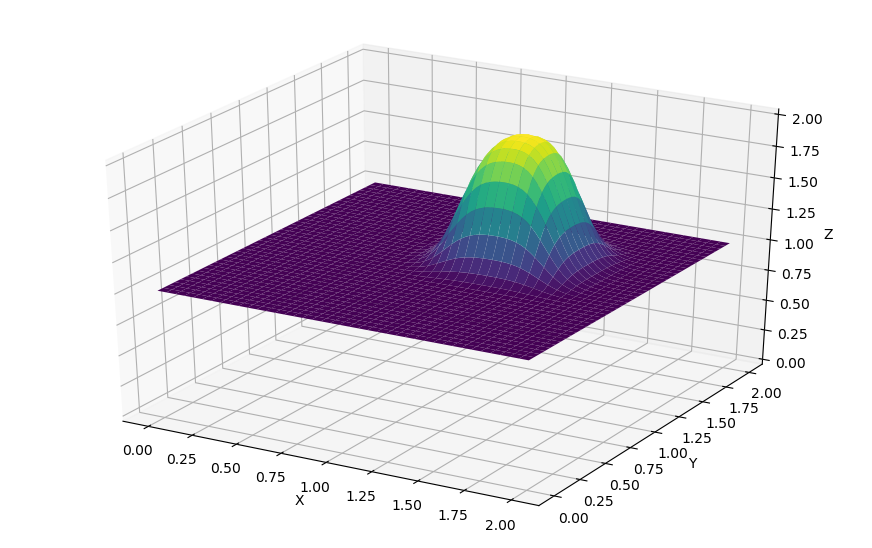

Wall time: 6.47 s


In [23]:
%%time
# coding: utf-8
from mpl_toolkits.mplot3d import Axes3D
import numpy
from matplotlib import pyplot, cm
%matplotlib inline

nx = 81
ny = 81
nt = 100
c = 1
dx = 2*1.0 / (nx-1)
dy = 2*1.0 / (ny-1)
sigma = .2
dt = sigma*dx

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))
un = numpy.ones((ny, nx))

u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1):
    un = u.copy()
    row, col = numpy.shape(u)
    for j in range(1, row):
        for i in range(1, col):
            u[j, i] = (un[j, i] - (c * dt / dx * (un[j, i] - un[j, i-1])) - (c * dt / dy * (un[j, i] - un[j-1, i])))
            u[0, :] = 1
            u[-1, :] = 1
            u[:, 0] = 1
            u[:, -1] = 1

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u[:], cmap = cm.viridis)
ax.set_xlabel( 'X ')
ax.set_ylabel( 'Y ')
ax.set_zlabel( 'Z ')
ax.set_zlim(0, 2)
pyplot.show()

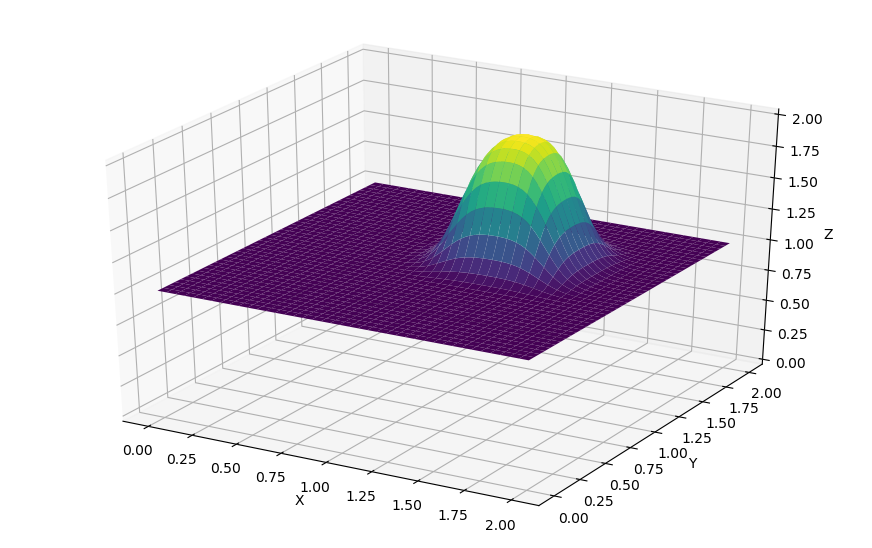

Wall time: 356 ms


In [2]:
%%time
# coding: utf-8
from mpl_toolkits.mplot3d import Axes3D
import numpy
from matplotlib import pyplot, cm
%matplotlib inline

nx = 81
ny = 81
nt = 100
c = 1
dx = 2*1.0 / (nx-1)
dy = 2*1.0 / (ny-1)
sigma = .2
dt = sigma*dx

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))
un = numpy.ones((ny, nx))

u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1):
    un = u.copy()
    u[1:, 1:] = (un[1:, 1:] - (c * dt / dx * (un[1:, 1:] - un[1:, :-1])) - (c * dt / dy * (un[1:, 1:] - un[:-1, 1:])))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u[:], cmap = cm.viridis)
ax.set_xlabel( 'X ')
ax.set_ylabel( 'Y ')
ax.set_zlabel( 'Z ')
ax.set_zlim(0, 2)
pyplot.show()

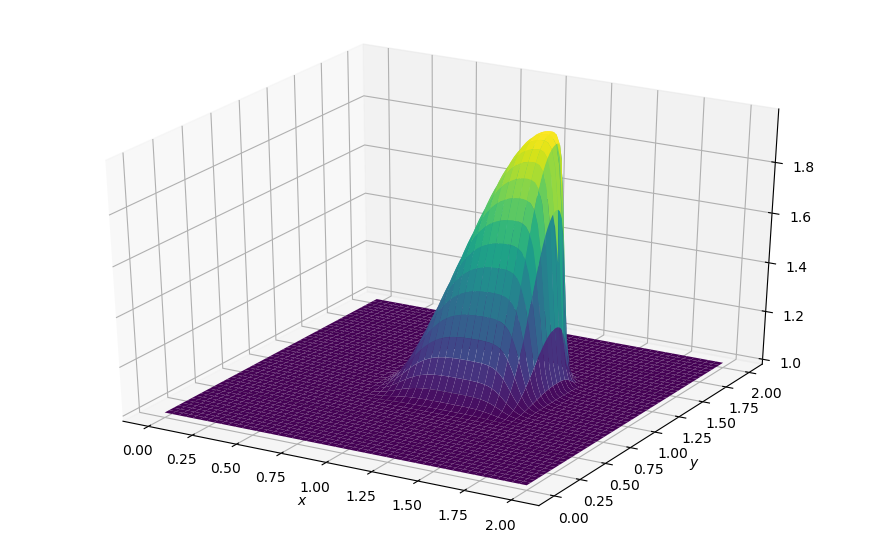

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
import numpy
%matplotlib inline

nx = 101
ny = 101
nt = 80
c = 1
dx = 2 / (nx-1)
dy = 2 / (ny-1)
sigma = .2
dt = sigma * dx

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))
v = numpy.ones((ny, nx))
un = numpy.ones((ny, nx))
vn = numpy.ones((ny, nx))

u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx +1)] = 2
v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx +1)] = 2
fig = pyplot.figure(figsize=(11, 7), dpi=100)
'''
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
#pyplot.show()
'''
for n in range(nt + 1):
    un = u.copy()
    vn = v.copy()
    u[1:, 1:] = (un[1:, 1:] - (un[1:, 1:] * c * dt / dx * (un[1:, 1:] - 
                un[1:, :-1])) - vn[1:, 1:] * c * dt / dy * (un[1:, 1:]
                - un[:-1, 1:]) )
    v[1:, 1:] = (vn[1:, 1:] - (un[1:, 1:] * c * dt / dx * (vn[1:, 1:] - 
                vn[1:, :-1])) - vn[1:, 1:] * c * dt / dy * (vn[1:, 1:]
                - vn[:-1, 1:]) )
    u[0, :] = u[-1, :] = u[:, 0] = u[:, -1] = 1
    v[0, :] = v[-1, :] = v[:, 0] = v[:, -1] = 1
    
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
pyplot.show()

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
import numpy
%matplotlib inline

nx = 31
ny = 31
nt = 17
nu = 0.5
dx = 2 / (nx-1)
dy = 2 / (ny-1)
sigma = .25
dt = sigma * dx * dy / nu

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))
un = numpy.ones((ny, nx))

u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx +1)] = 2

ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)

surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0,antialiased=False)
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(1, 2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
pyplot.show(surf)


In [34]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
import numpy
%matplotlib inline

nx = 31
ny = 31
nt = 17
nu = 0.5
dx = 2 / (nx-1)
dy = 2 / (ny-1)
sigma = .25
dt = sigma * dx * dy / nu

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
u = numpy.ones((ny, nx))
un = numpy.ones((ny, nx))

def diffuse(nt):
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    
    for n in range(nt + 1):
        un = u.copy()
        u[1:-1,1:-1] = (un[1:-1,1:-1] + nu * dt / dx**2 * (un[1:-1,2:] - 2 * un[1:-1,1:-1] + un[1:-1,0:-2]) + nu * dt / dy**2 * (un[2:,1:-1] - 2 * un[1:-1,1:-1] + un[0:-2,1:-1]))
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
    
    fig = pyplot.figure()
    ax = fig.gca(projection='3d')
    X, Y = numpy.meshgrid(x, y)
    
    surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0,antialiased=False)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    ax.set_zlim(1, 2.5)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    pyplot.show(surf)
    

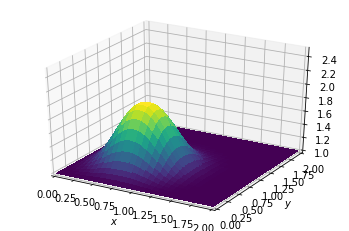

In [33]:
diffuse(10)

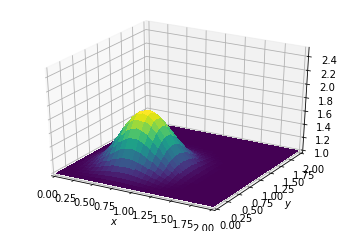

In [35]:
diffuse(14)

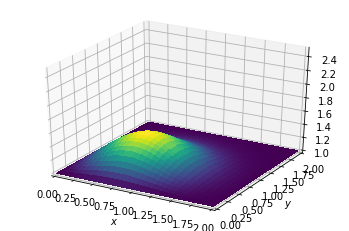

In [36]:
diffuse(50)

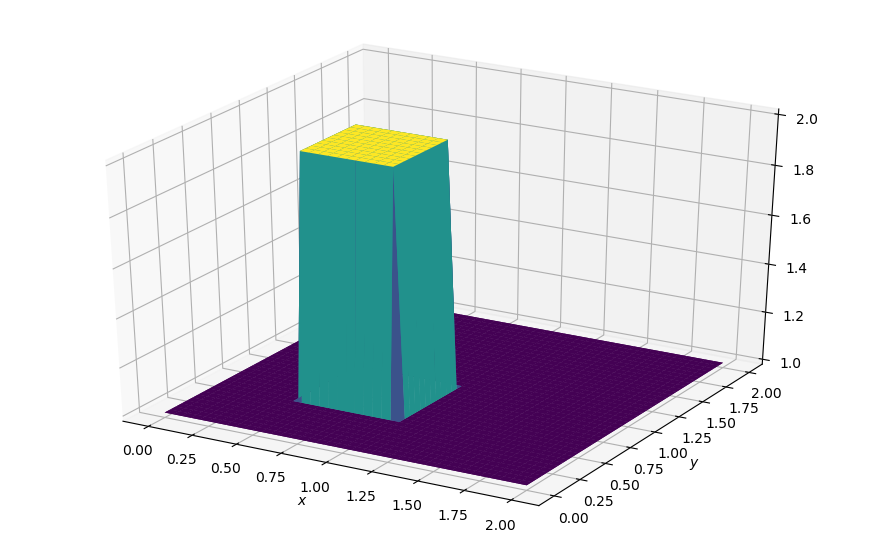

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
import numpy
%matplotlib inline

nx = 41
ny = 41
nt = 120
c = 1
dx = 2 / (nx-1)
dy = 2 / (ny-1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))
v = numpy.ones((ny, nx))
un = numpy.ones((ny, nx))
vn = numpy.ones((ny, nx))
comb = numpy.ones((ny, nx))

u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx +1)] = 2
v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx +1)] = 2

        
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=1, cstride=1)
ax.plot_surface(X, Y, v, cmap=cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
pyplot.show()

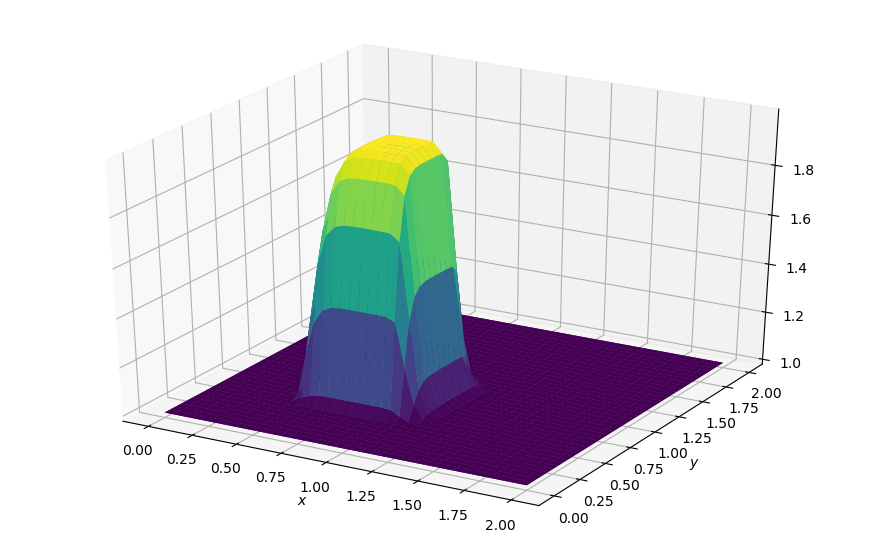

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
import numpy
%matplotlib inline

nx = 41
ny = 41
nt = 120
c = 1
dx = 2 / (nx-1)
dy = 2 / (ny-1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))
v = numpy.ones((ny, nx))
un = numpy.ones((ny, nx))
vn = numpy.ones((ny, nx))
comb = numpy.ones((ny, nx))

u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx +1)] = 2
v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx +1)] = 2

for n in range(nt + 1):
    un = u.copy()
    vn = v.copy()
    u[1:-1,1:-1] = ( un[1:-1,1:-1] - dt / dx * un[1:-1,1:-1] * ( un[1:-1,1:-1]
                    - un[1:-1,0:-2] ) - dt / dy * vn[1:-1,1:-1] * ( un[1:-1,1:-1]
                    - un[0:-2,1:-1] ) + nu * dt / dx**2 * ( un[1:-1,2:] -
                    2 * un[1:-1,1:-1] + un[1:-1,0:-2] ) + nu * dt / dy**2 * 
                    ( un[2:,1:-1] - 2 * un[1:-1,1:-1] + un[0:-2,1:-1] ))
    v[1:-1,1:-1] = (vn[1:-1,1:-1] - dt / dx * un[1:-1,1:-1] * (vn[1:-1,1:-1]
                    - vn[1:-1,0:-2] ) - dt / dy * vn[1:-1,1:-1] * (vn[1:-1,1:-1]
                    - vn[0:-2,1:-1] ) + nu * dt / dx**2 * (vn[1:-1,2:] -
                    2 * vn[1:-1,1:-1] + vn[1:-1,0:-2]) + nu * dt / dy**2 * 
                    (vn[2:,1:-1] - 2 * vn[1:-1,1:-1] + vn[0:-2,1:-1]))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
        
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1
        
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=1, cstride=1)
ax.plot_surface(X, Y, v, cmap=cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
pyplot.show()

In [21]:
def simpleadd(a,b):
    return a+b

In [22]:
simpleadd(3,7)

10

In [6]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def plot2D(x, y, p):
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    
    X, Y = numpy.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], cmap=cm.viridis, rstride=1, cstride=1, linewidth=0, antialiased=False)
    
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    pyplot.show()

In [7]:
def laplace2d(p, y, dx, dy, l1norm_target):
    l1norm = 1
    pn = numpy.empty_like(p)
    
    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1,1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) + dx**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1])) / (2 * (dx**2 + dy**2)))
        
        p[:, 0] = 0
        p[:, -1] = y
        p[0, :] = p[1, :]
        p[-1, :] = p[-2, :]
        l1norm = (numpy.sum(numpy.abs(p[:]) - numpy.abs(pn[:])) / numpy.sum(numpy.abs(pn[:])))
    return p

In [8]:
import numpy
nx = 31
ny = 31
c = 1
dx = 2 / (nx-1)
dy = 2 / (ny-1)

p = numpy.zeros((ny, nx))

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 1, ny) 

p[:, 0] = 0
p[:, -1] = y
p[0, :] = p[1, :]
p[-1, :]= p[-2, :]


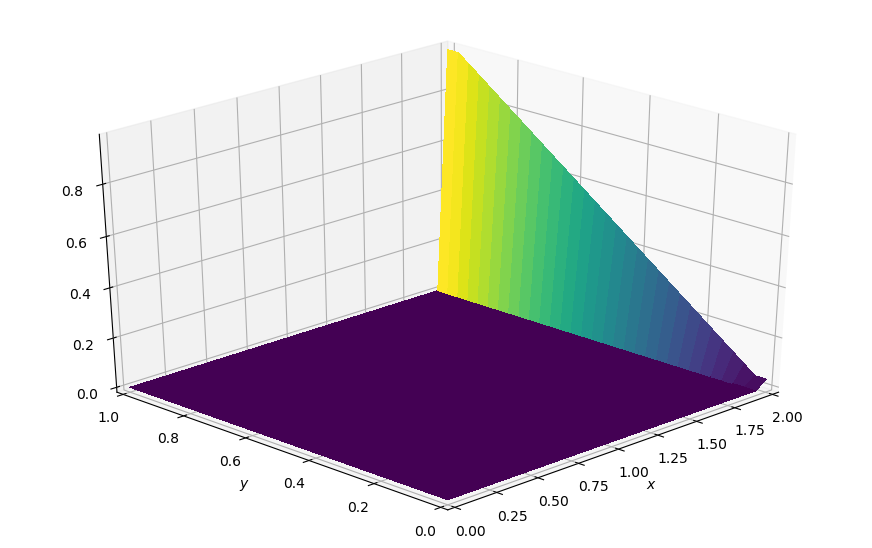

In [9]:
plot2D(x, y, p) 

In [13]:
p = laplace2d(p, y, dx, dy, 1e-4)

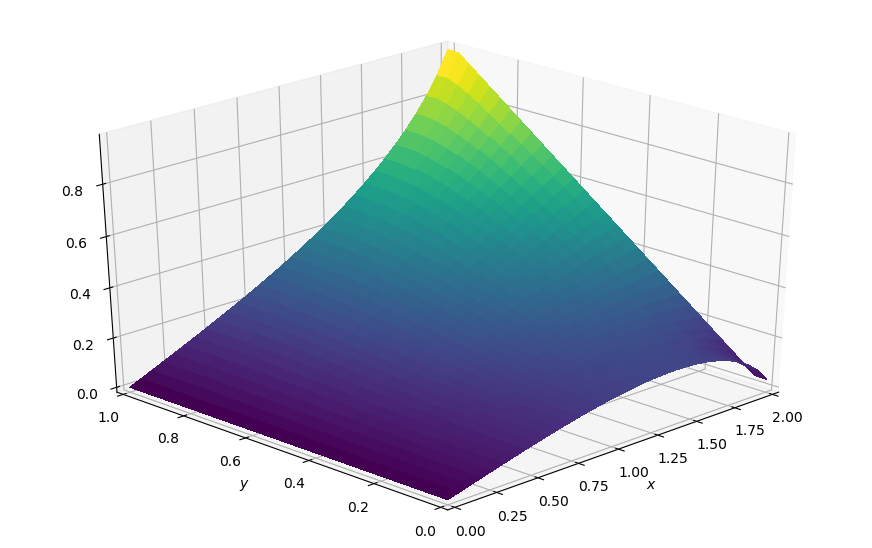

In [14]:
plot2D(x, y, p)

In [19]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

nx = 50
ny = 50
nt = 100
xmin = 0
xmax = 2
ymin = 0
ymax = 1

dx = (xmax - xmin) / (nx - 1)
dy = (ymax - ymin) / (ny - 1)

p = numpy.zeros((ny, nx))
pd = numpy.zeros((ny, nx))
b = numpy.zeros((ny, nx))
x = numpy.linspace(xmin, xmax, nx)
y = numpy.linspace(ymin, ymax, ny)

b[int(ny / 4), int(nx / 4)] = 100
b[int(3 * ny / 4),int(3 * nx / 4)] = -100


In [20]:
for it in range(nt):
    pd = p.copy()
    p[1:-1,1:-1] = (((pd[1:-1,2:] + pd[1:-1,:-2]) * dy**2 + (pd[2:,1:-1] + pd[:-2,1:-1]) * dx**2 - b[1:-1,1:-1] * dx**2 * dy**2) /
                   (2 * (dx**2 + dy**2)))
    p[0,:] = 0
    p[ny-1,:] = 0
    p[:, 0] = 0
    p[:, nx-1] = 0

In [21]:
def plot2D(x, y, p):
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    
    X, Y = numpy.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], cmap=cm.viridis, rstride=1, cstride=1, linewidth=0, antialiased=False)
    
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    pyplot.show()

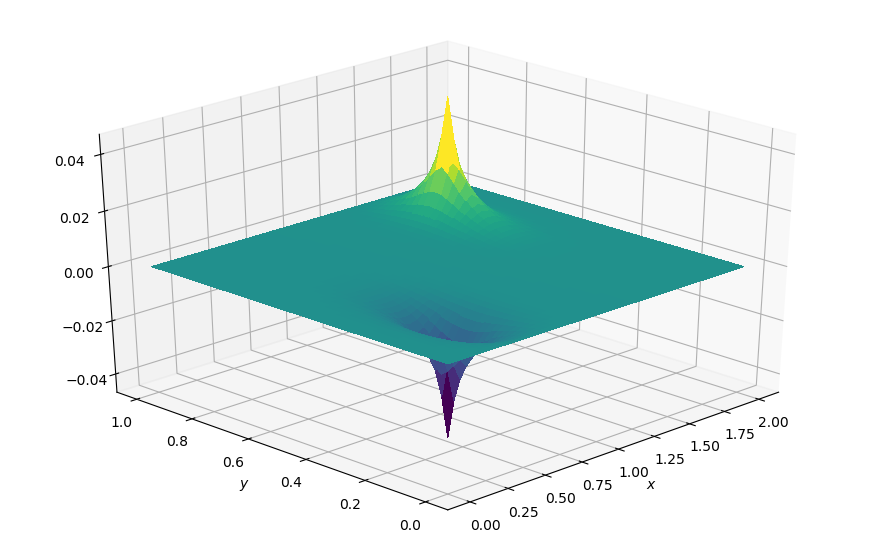

In [22]:
plot2D(x, y, p)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
import numpy
%matplotlib inline

nx = 41
ny = 41
c = 1
dx = 2 / (nx-1)
dy = 2 / (ny-1)

p = numpy.zeros((ny,nx))

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 1, ny)

p[0,:] = 0
p[:,-1] = 0
p[0, :] = p[1,:]
p[-1,:] = p[-2,:]

In [29]:
def laplace2d(p, y, dx, dy, l1norm_target):
    l1norm = 1
    pn = numpy.empty_like(p)
    
    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1,1:-1] = (dy**2*(pn[2:,1:-1]+pn[0:-2,1:-1])+dx**2*(pn[1:-1,2:]+pn[1:-1,0:-2]))/(2*(dx**2+dy**2))
        p[0,0] = (dy**2*(pn[1,0]+pn[-1,0])+dx**2*(pn[0,1]+pn[0,-1]))/(2*(dx**2+dy**2))           
        p[-1,-1] = (dy**2*(pn[0,-1]+pn[-2,-1])+dx**2*(pn[-1,0]+pn[-1,-2]))/(2*(dx**2+dy**2))
        
        p[:, 0] = 0
        p[:, -1] = y
        p[0, :] = p[1, :]
        p[-1, :] = p[-2, :]
        l1norm = (numpy.sum(numpy.abs(p[:]) - numpy.abs(pn[:])) / numpy.sum(numpy.abs(pn[:])))
    return p

In [32]:
%%timeit
laplace2d(p, y, dx, dy, .0001)

54 µs ± 976 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [39]:
from numba import autojit
@autojit
def laplace2d_numba(p, y, dx, dy, l1norm_target):
    l1norm = 1
    pn = numpy.empty_like(p)
    
    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1,1:-1] = (dy**2*(pn[2:,1:-1]+pn[0:-2,1:-1])+dx**2*(pn[1:-1,2:]+pn[1:-1,0:-2]))/(2*(dx**2+dy**2))
        p[0,0] = (dy**2*(pn[1,0]+pn[-1,0])+dx**2*(pn[0,1]+pn[0,-1]))/(2*(dx**2+dy**2))           
        p[-1,-1] = (dy**2*(pn[0,-1]+pn[-2,-1])+dx**2*(pn[-1,0]+pn[-1,-2]))/(2*(dx**2+dy**2))
        
        p[:, 0] = 0
        p[:, -1] = y
        p[0, :] = p[1, :]
        p[-1, :] = p[-2, :]
        l1norm = (numpy.sum(numpy.abs(p[:]) - numpy.abs(pn[:])) / numpy.sum(numpy.abs(pn[:])))
    return p

In [40]:
%%timeit
laplace2d_numba(p, y, dx, dy, .0001)

24.2 µs ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [67]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
import numpy
%matplotlib inline

nx = 41
ny = 41
nit = 50
c = 1
dx = 2 / (nx-1)
dy = 2 / (ny-1)

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 1, ny)
X, Y = numpy.meshgrid(x, y)

rho = 1
nu = .1
dt = .001

In [68]:
def build_up_b(b, rho, dt, u, v, dx, dy):
    b[1:-1, 1:-1] = (rho * (1 / dt * ((u[1:-1, 2:] - u[1:-1, 0:-2]) /
                    (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))
                    - ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 - 2 *
                    ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) * (v[1:-1, 2:]
                    - v[1:-1, 0:-2]) / (2 * dx)) - ((v[2:, 1:-1] -
                    v[0:-2, 1:-1]) / (2 * dy))**2))
    return b

In [69]:
def pressure_poisson(p, dx, dy, b):
    pn = numpy.empty_like(p)
    pn = p.copy()
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 +
                        (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                        (2 * (dx**2 + dy**2)) - dx**2 * dy**2 /
                        (2 * (dx**2 + dy**2)) * b[1:-1,1:-1])
        p[:, -1] = p[:, -2] # dp/dy = 0 当x = 2时
        p[0, :] = p[1, :] # dp/dy = 0 当y = 0时
        p[:, 0] = p[:, 1] # dp/dx = 0 当x = 0时
        p[-1, :] = 0 # p = 0 当y = 2时
    return p

In [72]:
def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu):
    un = numpy.empty_like(u)
    vn = numpy.empty_like(v)
    b = numpy.zeros((ny, nx))
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        
        b = build_up_b(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy, b)
        
        u[1:-1, 1:-1] = (un[1:-1, 1:-1] - un[1:-1, 1:-1] * dt / dx *
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) - dt /
                        (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2])
                        + nu * (dt / dx**2 * (un[1:-1, 2:] - 2 *
                        un[1:-1, 1:-1] + un[1:-1, 0:-2]) + dt / dy**2 *
                        (un[2:,1:-1] - 2 * un[1:-1,1:-1] + un[0:-2,1:-1])))
        
        v[1:-1,1:-1] = (vn[1:-1, 1:-1] - un[1:-1, 1:-1] * dt / dx *
                        (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                        (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) - dt /
                        (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1])
                        + nu * (dt / dx**2 * (vn[1:-1, 2:] - 2 *
                        vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) + dt / dy**2 *
                        (vn[2:,1:-1] - 2 * vn[1:-1,1:-1] + vn[0:-2,1:-1])))
        u[0, :] = 0
        u[:, 0] = 0
        u[:, -1] = 0
        u[-1, :] = 1 # 在空腔盖子处令速度等于1。
        v[0, :] = 0
        v[-1, :] = 0
        v[:, 0] = 0
        v[:, -1] = 0
    return u, v, p

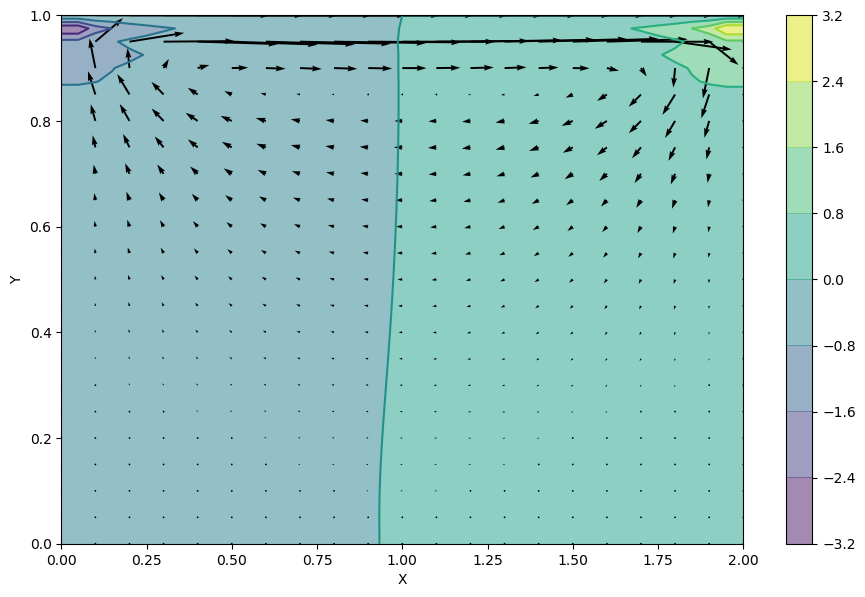

In [73]:
u = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
p = numpy.zeros((ny, nx))
b = numpy.zeros((ny, nx))
nt = 100
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)
fig = pyplot.figure(figsize=(11,7), dpi=100)
# 以等值线的方式绘制压力场
pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
pyplot.colorbar()
# plotting the pressure field outlines
pyplot.contour(X, Y, p, cmap=cm.viridis)
# 绘制速度场的轮廓线
pyplot.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2])
pyplot.xlabel('X')
pyplot.ylabel('Y')
pyplot.show()

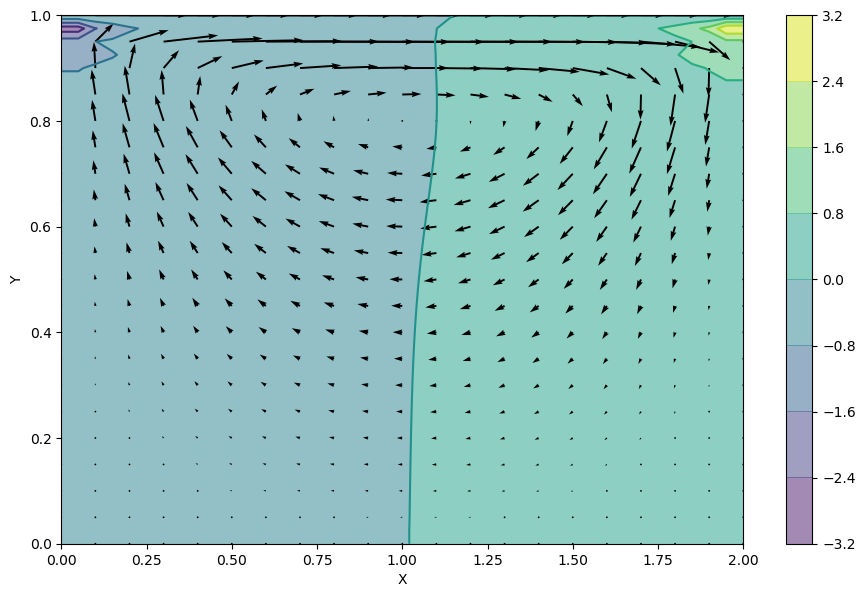

In [74]:
u = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
p = numpy.zeros((ny, nx))
b = numpy.zeros((ny, nx))
nt = 500
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)
fig = pyplot.figure(figsize=(11,7), dpi=100)
# 以等值线的方式绘制压力场
pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
pyplot.colorbar()
# plotting the pressure field outlines
pyplot.contour(X, Y, p, cmap=cm.viridis)
# 绘制速度场的轮廓线
pyplot.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2])
pyplot.xlabel('X')
pyplot.ylabel('Y')
pyplot.show()

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
import numpy
%matplotlib inline

In [3]:
def build_up_b(rho, dt, dx, dy, u, v):
    b = numpy.zeros_like(u)
    b[1:-1, 1:-1] = (rho * (1 / dt * ((u[1:-1, 2:] - u[1:-1, 0:-2]) /
                    (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))
                    - ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 - 2
                    * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                    (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                    ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))
# 周期性边界条件压力@ x = 2
    b[1:-1, -1] = (rho * (1 / dt * ((u[1:-1, 0] - u[1:-1,-2]) /
                    (2 * dx) + (v[2:, -1] - v[0:-2, -1]) / (2 * dy))
                    - ((u[1:-1, 0] - u[1:-1, -2]) / (2 * dx))**2 - 2
                    * ((u[2:, -1] - u[0:-2, -1]) / (2 * dy) *
                    (v[1:-1, 0] - v[1:-1, -2]) / (2 * dx)) -
                    ((v[2:, -1] - v[0:-2, -1]) / (2 * dy))**2))
# 周期性边界条件压力@ x = 0
    b[1:-1, 0] = (rho * (1 / dt * ((u[1:-1, 1] - u[1:-1, -1]) /
                (2 * dx) + (v[2:, 0] - v[0:-2, 0]) / (2 * dy))
                - ((u[1:-1, 1] - u[1:-1, -1]) / (2 * dx))**2 - 2
                * ((u[2:, 0] - u[0:-2, 0]) / (2 * dy) *
                (v[1:-1, 1] - v[1:-1, -1]) / (2 * dx))-
                ((v[2:, 0] - v[0:-2, 0]) / (2 * dy))**2))
    return b

In [4]:
def pressure_poisson_periodic(p, dx, dy):
    pn = numpy.empty_like(p)
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 +
                        (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                        (2 * (dx**2 + dy**2)) - dx**2 * dy**2 /
                        (2 * (dx**2 + dy**2)) * b[1:-1, 1:-1])
# 周期边界条件压力@ x = 2
        p[1:-1, -1] = (((pn[1:-1, 0] + pn[1:-1, -2])* dy**2 +
                    (pn[2:, -1] + pn[0:-2, -1]) * dx**2) /
                    (2 * (dx**2 + dy**2)) - dx**2 * dy**2 /
                    (2 * (dx**2 + dy**2)) * b[1:-1, -1])
# 周期边界条件压力@ x = 0
        p[1:-1, 0] = (((pn[1:-1, 1] + pn[1:-1, -1])* dy**2 +
                    (pn[2:, 0] + pn[0:-2, 0]) * dx**2) /
                    (2 * (dx**2 + dy**2)) - dx**2 * dy**2 /
                    (2 * (dx**2 + dy**2)) * b[1:-1, 0])
# 墙壁边界条件, 压力
        p[-1, :] =p[-2, :] # dp/dy = 0 at y = 2
        p[0, :] = p[1, :] # dp/dy = 0 at y = 0
    return p

In [6]:
# 变量声明
nx = 41
ny = 41
nt = 10
nit = 50
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
X, Y = numpy.meshgrid(x, y)
# 物理变量
rho = 1
nu = .1
F = 1
dt = .01
# 初始状态
u = numpy.zeros((ny, nx))
un = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
vn = numpy.zeros((ny, nx))
p = numpy.ones((ny, nx))
pn = numpy.ones((ny, nx))
b = numpy.zeros((ny, nx))

In [7]:
udiff = 1
stepcount = 0
while udiff > .001:
    un = u.copy()
    vn = v.copy()
    b = build_up_b(rho, dt, dx, dy, u, v)
    p = pressure_poisson_periodic(p, dx, dy)
    u[1:-1, 1:-1] = (un[1:-1, 1:-1] - un[1:-1, 1:-1] * dt / dx *
                    (un[1:-1, 1:-1] - un[1:-1, 0:-2]) - vn[1:-1, 1:-1] *
                    dt / dy * (un[1:-1, 1:-1] - un[0:-2, 1:-1]) - dt /
                    (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                    nu * (dt / dx**2 * (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] +
                    un[1:-1, 0:-2]) + dt / dy**2 * (un[2:, 1:-1] - 2 *
                    un[1:-1, 1:-1] + un[0:-2, 1:-1])) + F * dt)
    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] - un[1:-1, 1:-1] * dt / dx *
                    (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) - vn[1:-1, 1:-1] *
                    dt / dy * (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) - dt /
                    (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                    nu * (dt / dx**2 * (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] +
                    vn[1:-1, 0:-2]) + dt / dy**2 * (vn[2:, 1:-1] - 2 *
                    vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))
# 周期边界条件u @ x = 2
    u[1:-1, -1] = (un[1:-1, -1] - un[1:-1, -1] * dt / dx *
                    (un[1:-1, -1] - un[1:-1, -2]) - vn[1:-1, -1] *
                    dt / dy * (un[1:-1, -1] - un[0:-2, -1]) - dt /
                    (2 * rho * dx) * (p[1:-1, 0] - p[1:-1, -2]) +
                    nu * (dt / dx**2 * (un[1:-1, 0] - 2 * un[1:-1,-1] +
                    un[1:-1, -2]) + dt / dy**2 * (un[2:, -1] - 2 *
                    un[1:-1, -1] + un[0:-2, -1])) + F * dt)
# 周期边界条件u @ x = 0
    u[1:-1, 0] = (un[1:-1, 0] - un[1:-1, 0] * dt / dx *
                (un[1:-1, 0] - un[1:-1, -1]) - vn[1:-1, 0] * dt /
                dy * (un[1:-1, 0] - un[0:-2, 0]) - dt / (2 * rho * dx) *
                (p[1:-1, 1] - p[1:-1, -1]) + nu * (dt / dx**2 *
                (un[1:-1, 1] - 2 * un[1:-1, 0] + un[1:-1, -1]) + dt /
                dy**2 * (un[2:, 0] - 2 * un[1:-1, 0] + un[0:-2, 0])) + F * dt)
# 周期边界条件v @ x = 2
    v[1:-1, -1] = (vn[1:-1, -1] - un[1:-1, -1] * dt / dx *
                    (vn[1:-1, -1] - vn[1:-1, -2]) - vn[1:-1, -1] * dt /
                    dy * (vn[1:-1, -1] - vn[0:-2, -1]) - dt /
                    (2 * rho * dy) * (p[2:, -1] - p[0:-2, -1]) + nu *
                    (dt / dx**2 * (vn[1:-1, 0] - 2 * vn[1:-1, -1] +
                    vn[1:-1, -2]) + dt / dy**2 * (vn[2:, -1] - 2 *
                    vn[1:-1, -1] + vn[0:-2, -1])))
# 周期边界条件v @ x = 0
    v[1:-1, 0] = (vn[1:-1, 0] - un[1:-1, 0] * dt / dx *
                (vn[1:-1, 0] - vn[1:-1, -1]) - vn[1:-1, 0] * dt / dy *
                (vn[1:-1, 0] - vn[0:-2, 0]) - dt / (2 * rho * dy) *
                (p[2:, 0] - p[0:-2, 0]) + nu * (dt / dx**2 *
                (vn[1:-1, 1] - 2 * vn[1:-1, 0] + vn[1:-1, -1])
                + dt / dy**2 * (vn[2:, 0] - 2 * vn[1:-1, 0] + vn[0:-2, 0])))
# 墙壁边界条件: u,v = 0 @ y = 0,2
    u[0, :] = 0
    u[-1, :] = 0
    v[0, :] = 0
    v[-1, :]=0
    udiff = (numpy.sum(u) - numpy.sum(un)) / numpy.sum(u)
    stepcount += 1

In [8]:
print(stepcount)

499


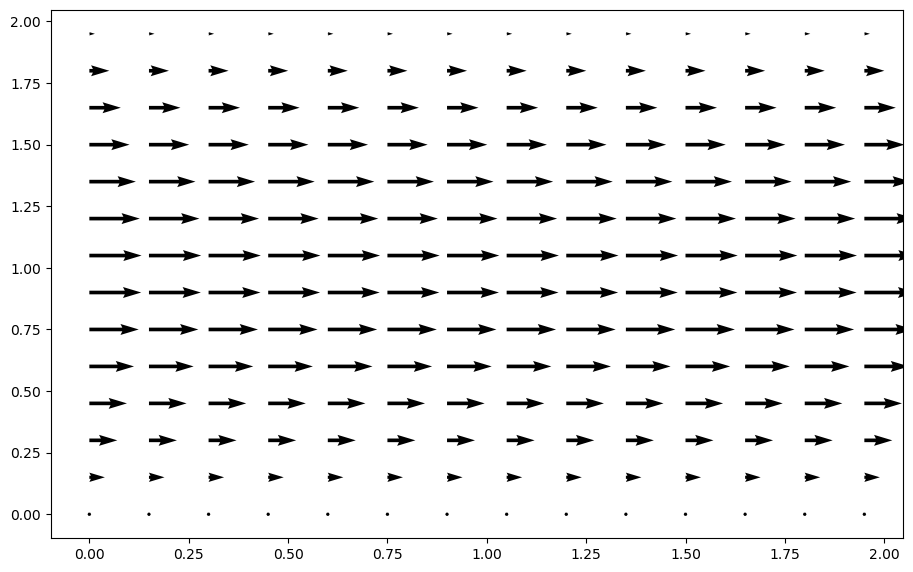

In [9]:
fig = pyplot.figure(figsize = (11,7), dpi=100)
pyplot.quiver(X[::3, ::3], Y[::3, ::3], u[::3, ::3], v[::3, ::3])
pyplot.show()